In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1 = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
file1

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      effective_to_date month employment_status gender  income  ...  \
0               2/18/11   feb          employed      m   48029  ...   
1               1/18/11   jan        unemployed      f   92260  ...   
2               2/10/11   feb          employed      m   22139  ...   
3               1/11/11   jan          employed      m   49078  ...   
4               1/17/11   jan     medical leave      f   23675  ...   
...                 ...   ...               ...    ...     ...  ...   
10684           1/19/11   jan        unemployed      f   61541  ...   
10685            1/6/11   jan          employed      f   61146  ...   
10686            2/6/11   feb          employed      f   39837  ...   
10687           2/13/11   feb          employed      f   64195  ...   
10688            1/8/11   jan        unemployed      m   68942  ...   

      months_since_policy_inception number_of_open_complaints  \
0                                52                         0   
1                                26                         0   
2                                31                         0   
3                                 3                         0   
4                                31                         0   
...                             ...                       ...   
10684                            40                         0   
10685                            68                         0   
10686                            63                         0   
10687                            27                         4   
10688                             1                         0   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  corporate auto  corporate l3            offer3   
1                       1   personal auto   personal l3            offer4   
2                       2   personal auto   personal l3            offer3   
3                       2  corporate auto  corporate l3            offer2   
4                       7   personal auto   personal l2            offer1   
...                   ...             ...           ...               ...   
10684                   7   personal auto   personal l1            offer3   
10685                   6   personal auto   personal l3            offer2   
10686                   2  corporate auto  corporate l3            offer1   
10687                   6   personal auto   personal l1            offer1   
10688                   3   personal auto   personal l1            offer4   

       sales_channel total_claim_amount  vehicle_class vehicle_size  
0              agent                292  four-door car      medsize  
1        call center                744  four-door car      medsize  
2        call center                480            suv      medsize  
3             branch                484  four-door car      medsize  
4             branch                707  four-door car      medsize  
...              ...                ...            ...          ...  
10684            web               1214     luxury

In [4]:
file1.count()

region                           10689
customer_lifetime_value          10689
response                         10689
coverage                         10689
education                        10689
effective_to_date                10689
month                            10689
employment_status                10689
gender                           10689
income                           10689
location_code                    10689
marital_status                   10689
monthly_premium_auto             10689
months_since_last_claim          10689
months_since_policy_inception    10689
number_of_open_complaints        10689
number_of_policies               10689
policy_type                      10689
policy                           10689
renew_offer_type                 10689
sales_channel                    10689
total_claim_amount               10689
vehicle_class                    10689
vehicle_size                     10689
dtype: int64

In [5]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [6]:
categorical_df = file1.select_dtypes(include = 'object')

In [7]:
categorical_df

region response  coverage education effective_to_date month  \
0          central       no     basic   college           2/18/11   feb   
1      west region       no     basic   college           1/18/11   jan   
2             east       no     basic  bachelor           2/10/11   feb   
3       north west      yes  extended   college           1/11/11   jan   
4       north west       no   premium  bachelor           1/17/11   jan   
...            ...      ...       ...       ...               ...   ...   
10684      central       no   premium  bachelor           1/19/11   jan   
10685   north west       no     basic   college            1/6/11   jan   
10686      central       no  extended  bachelor            2/6/11   feb   
10687  west region       no   premium   college           2/13/11   feb   
10688      central       no     basic  bachelor            1/8/11   jan   

      employment_status gender location_code marital_status     policy_type  \
0              employed      m      suburban        married  corporate auto   
1            unemployed      f      suburban         single   personal auto   
2              employed      m      suburban         single   personal auto   
3              employed      m      suburban         single  corporate auto   
4         medical leave      f      suburban        married   personal auto   
...                 ...    ...           ...            ...             ...   
10684        unemployed      f      suburban        married   personal auto   
10685          employed      f         urban        married   personal auto   
10686          employed      f         rural        married  corporate auto   
10687          employed      f         urban       divorced   personal auto   
10688        unemployed      m      suburban         single   personal auto   

             policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0      corporate l3           offer3         agent  four-door car      medsize  
1       personal l3           offer4   call center  four-door car      medsize  
2       personal l3           offer3   call center            suv      medsize  
3      corporate l3           offer2        branch  four-door car      medsize  
4       personal l2           offer1        branch  four-door car      medsize  
...             ...              ...           ...            ...          ...  
10684   personal l1           offer3           web     luxury car      medsize  
10685   personal l3           offer2        branch  four-door car      medsize  
10686  corporate l3           offer1           web     luxury suv      medsize  
10687   personal l1           offer1        branch            suv      medsize  
10688   personal l1           offer4           web            suv      medsize  

[10689 rows x 16 columns]

In [8]:
numerical_df = file1.select_dtypes(include = 'int64')

In [9]:
numerical_df

customer_lifetime_value  income  monthly_premium_auto  \
0                         4809   48029                    61   
1                         2228   92260                    64   
2                        14947   22139                   100   
3                        22332   49078                    97   
4                         9025   23675                   117   
...                        ...     ...                   ...   
10684                    15563   61541                   253   
10685                     5259   61146                    65   
10686                    23893   39837                   201   
10687                    11971   64195                   158   
10688                     6857   68942                   101   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34                             31   
3                           10                              3   
4                           33                             31   
...                        ...                            ...   
10684                       12                             40   
10685                        7                             68   
10686                       11                             63   
10687                        0                             27   
10688                       31                              1   

       number_of_open_complaints  number_of_policies  total_claim_amount  
0                              0                   9                 292  
1                              0                   1                 744  
2                              0                   2                 480  
3                              0                   2                 484  
4                              0                   7                 707  
...                          ...                 ...                 ...  
10684                          0                   7                1214  
10685                          0                   6                 273  
10686                          0                   2                 381  
10687                          4                   6                 618  
10688                          0                   3                1021  

[10689 rows x 8 columns]

### Use seaborn library to construct distribution plots for the numerical variables

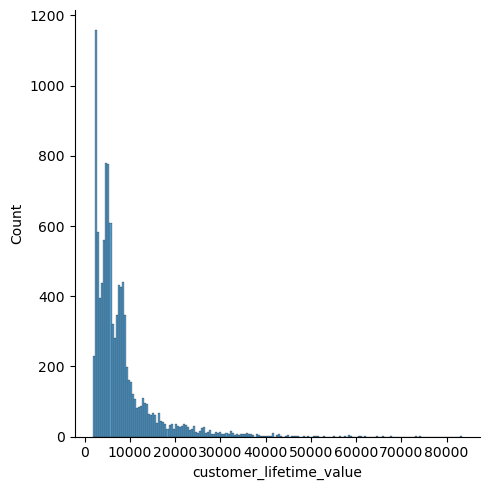

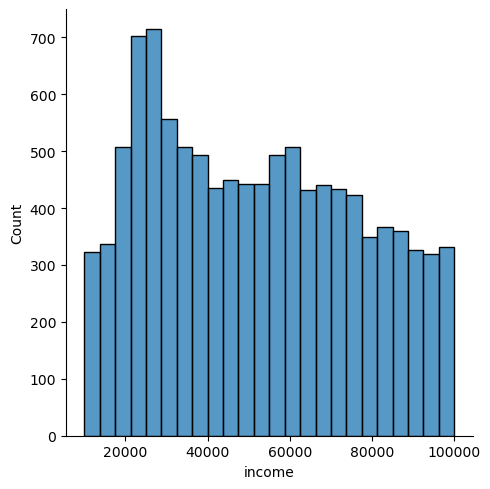

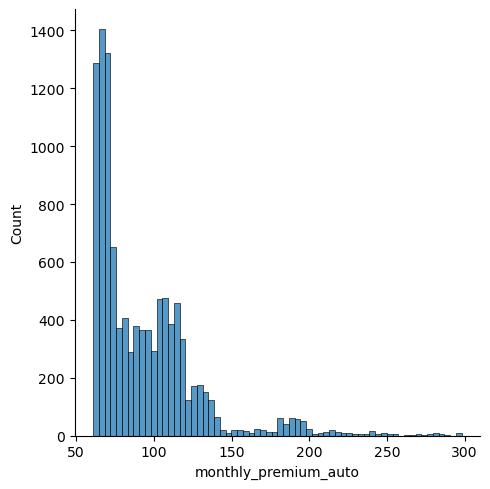

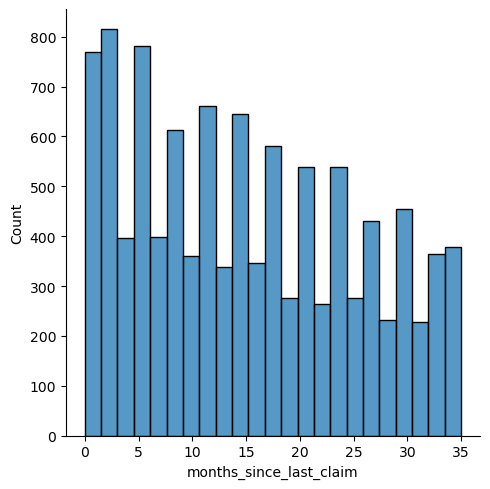

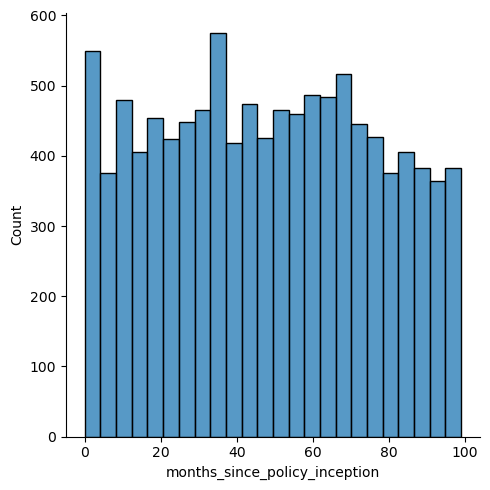

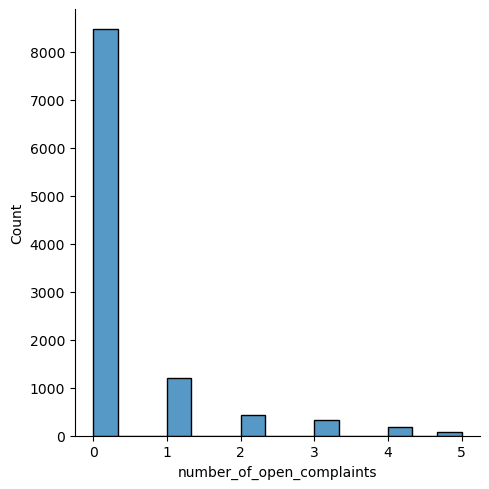

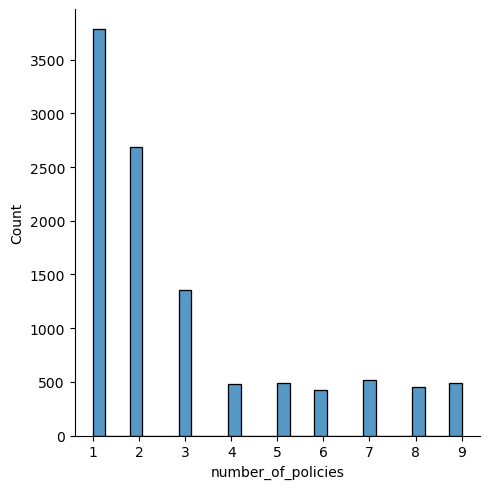

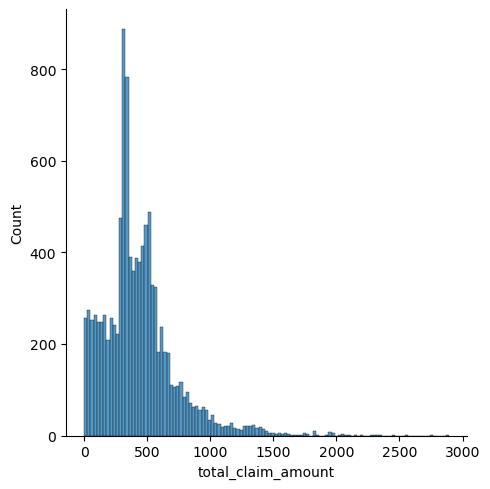

In [12]:
sns.displot(numerical_df, x="customer_lifetime_value")
sns.displot(numerical_df, x="income")
sns.displot(numerical_df, x="monthly_premium_auto")
sns.displot(numerical_df, x="months_since_last_claim")
sns.displot(numerical_df, x="months_since_policy_inception")
sns.displot(numerical_df, x="number_of_open_complaints")
sns.displot(numerical_df, x="number_of_policies")
sns.displot(numerical_df, x="total_claim_amount")


### Use Matplotlib to construct histograms.

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

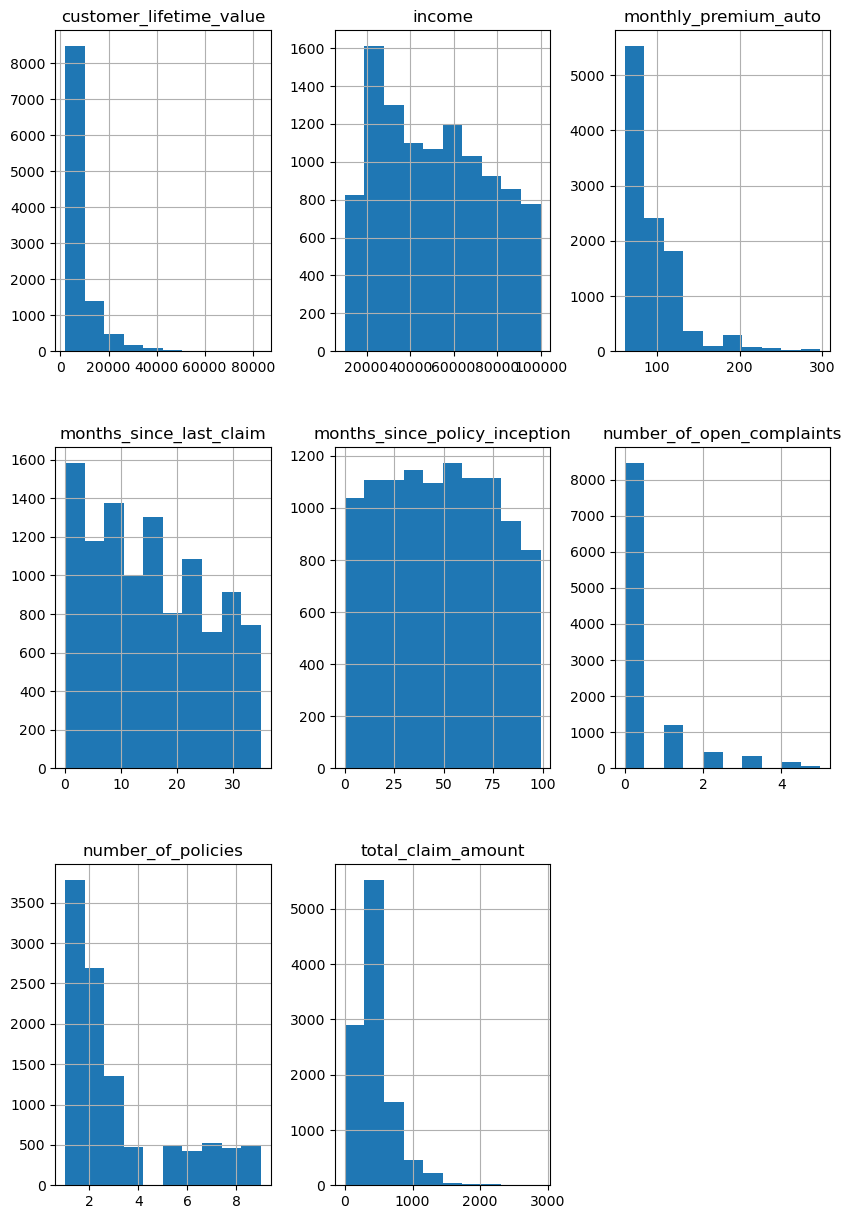

In [15]:
numerical_df.hist(figsize=(10,15))

### Do the distributions for different numerical variables look like a normal distribution?

In [ ]:
No, they do not look like a normal distribution. 

### For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.

In [20]:
numerical_df2 = numerical_df.drop(columns = 'total_claim_amount')


In [21]:
numerical_df2

customer_lifetime_value  income  monthly_premium_auto  \
0                         4809   48029                    61   
1                         2228   92260                    64   
2                        14947   22139                   100   
3                        22332   49078                    97   
4                         9025   23675                   117   
...                        ...     ...                   ...   
10684                    15563   61541                   253   
10685                     5259   61146                    65   
10686                    23893   39837                   201   
10687                    11971   64195                   158   
10688                     6857   68942                   101   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34                             31   
3                           10                              3   
4                           33                             31   
...                        ...                            ...   
10684                       12                             40   
10685                        7                             68   
10686                       11                             63   
10687                        0                             27   
10688                       31                              1   

       number_of_open_complaints  number_of_policies  
0                              0                   9  
1                              0                   1  
2                              0                   2  
3                              0                   2  
4                              0                   7  
...                          ...                 ...  
10684                          0                   7  
10685                          0                   6  
10686                          0                   2  
10687                          4                   6  
10688                          0                   3  

[10689 rows x 7 columns]

In [44]:
numerical_correlation = numerical_df[numerical_df2.columns[1:]].corr()

In [45]:
numerical_correlation 

income  monthly_premium_auto  \
income                         1.000000             -0.002431   
monthly_premium_auto          -0.002431              1.000000   
months_since_last_claim       -0.026564              0.010036   
months_since_policy_inception  0.003846              0.019696   
number_of_open_complaints      0.018903             -0.008811   
number_of_policies            -0.004461             -0.018805   

                               months_since_last_claim  \
income                                       -0.026564   
monthly_premium_auto                          0.010036   
months_since_last_claim                       1.000000   
months_since_policy_inception                -0.034086   
number_of_open_complaints                     0.001204   
number_of_policies                            0.000814   

                               months_since_policy_inception  \
income                                              0.003846   
monthly_premium_auto                                0.019696   
months_since_last_claim                            -0.034086   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.002554   
number_of_policies                                 -0.009719   

                               number_of_open_complaints  number_of_policies  
income                                          0.018903           -0.004461  
monthly_premium_auto                           -0.008811           -0.018805  
months_since_last_claim                         0.001204            0.000814  
months_since_policy_inception                   0.002554           -0.009719  
number_of_open_complaints                       1.000000           -0.000303  
number_of_policies                             -0.000303            1.000000

<AxesSubplot:>

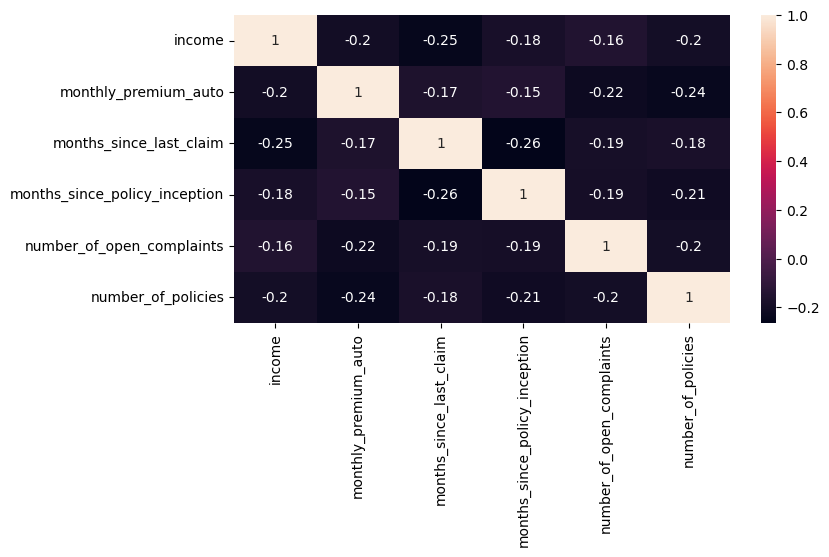

In [46]:
fig=plt.figure(figsize=(8,4))
sns.heatmap(numerical_correlation.corr(),annot=True)

### Plot the Correlation Heatmap.

<AxesSubplot:>

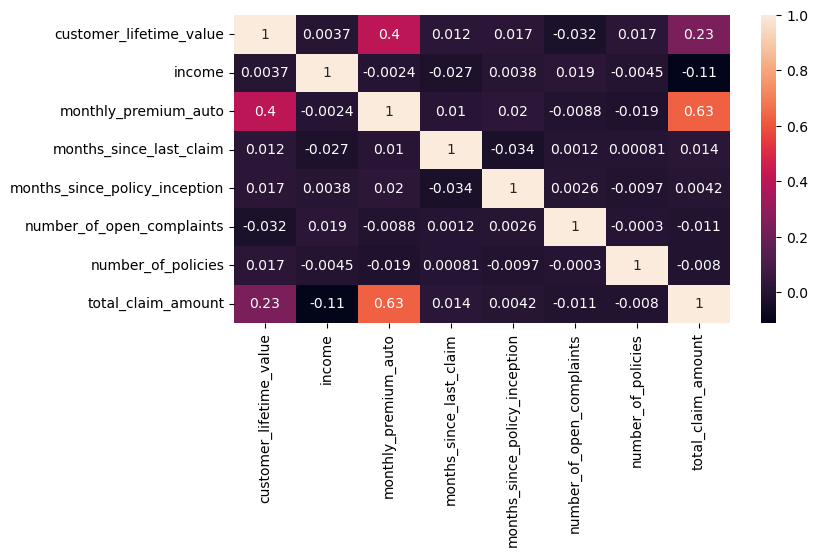

In [18]:
fig=plt.figure(figsize=(8,4))
sns.heatmap(numerical_df.corr(),annot=True)

### (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [36]:
df = pd.DataFrame(file1)  

In [38]:
cor_matrix = df.corr().abs()


In [39]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/var/folders/14/fzxrp6114zn_3n_1844ck_1c0000gn/T/ipykernel_35144/3673341754.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [40]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [41]:
 df1 = df.drop(df.columns[to_drop], axis=1)

In [42]:
df1

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      effective_to_date month employment_status gender  income  ...  \
0               2/18/11   feb          employed      m   48029  ...   
1               1/18/11   jan        unemployed      f   92260  ...   
2               2/10/11   feb          employed      m   22139  ...   
3               1/11/11   jan          employed      m   49078  ...   
4               1/17/11   jan     medical leave      f   23675  ...   
...                 ...   ...               ...    ...     ...  ...   
10684           1/19/11   jan        unemployed      f   61541  ...   
10685            1/6/11   jan          employed      f   61146  ...   
10686            2/6/11   feb          employed      f   39837  ...   
10687           2/13/11   feb          employed      f   64195  ...   
10688            1/8/11   jan        unemployed      m   68942  ...   

      months_since_policy_inception number_of_open_complaints  \
0                                52                         0   
1                                26                         0   
2                                31                         0   
3                                 3                         0   
4                                31                         0   
...                             ...                       ...   
10684                            40                         0   
10685                            68                         0   
10686                            63                         0   
10687                            27                         4   
10688                             1                         0   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  corporate auto  corporate l3            offer3   
1                       1   personal auto   personal l3            offer4   
2                       2   personal auto   personal l3            offer3   
3                       2  corporate auto  corporate l3            offer2   
4                       7   personal auto   personal l2            offer1   
...                   ...             ...           ...               ...   
10684                   7   personal auto   personal l1            offer3   
10685                   6   personal auto   personal l3            offer2   
10686                   2  corporate auto  corporate l3            offer1   
10687                   6   personal auto   personal l1            offer1   
10688                   3   personal auto   personal l1            offer4   

       sales_channel total_claim_amount  vehicle_class vehicle_size  
0              agent                292  four-door car      medsize  
1        call center                744  four-door car      medsize  
2        call center                480            suv      medsize  
3             branch                484  four-door car      medsize  
4             branch                707  four-door car      medsize  
...              ...                ...            ...          ...  
10684            web               1214     luxury